In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load MovieLens dataset
# Download from: https://grouplens.org/datasets/movielens/latest/
# Using the small dataset (ml-latest-small.zip)

# Load movies data
movies = pd.read_csv('movies.csv')

# Load ratings data
ratings = pd.read_csv('ratings.csv')

print("Dataset Shape:")
print(f"Movies: {movies.shape}")
print(f"Ratings: {ratings.shape}")
print("\n" + "="*50)
print("\nFirst few rows of Movies:")
print(movies.head())
print("\nFirst few rows of Ratings:")
print(ratings.head())

Dataset Shape:
Movies: (9742, 3)
Ratings: (100836, 4)


First few rows of Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

First few rows of Ratings:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [3]:
# Basic information about the datasets
print("Movies Dataset Info:")
print(movies.info())
print("\n" + "="*50)

print("\nRatings Dataset Info:")
print(ratings.info())
print("\n" + "="*50)

# Check for missing values
print("\nMissing Values in Movies:")
print(movies.isnull().sum())
print("\nMissing Values in Ratings:")
print(ratings.isnull().sum())

# Basic statistics
print("\n" + "="*50)
print("\nRatings Statistics:")
print(ratings['rating'].describe())

Movies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


Missing Values in Movies:
movieId    0
title      0
genres     0
dtype: int64

Missing Values in Ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


Ratings Stati

In [4]:
# Merge ratings with movies
movie_ratings = pd.merge(ratings, movies, on='movieId')

print("Merged Dataset Shape:", movie_ratings.shape)
print("\nFirst few rows of merged data:")
print(movie_ratings.head(10))

# Check the merged dataset
print("\n" + "="*50)
print("\nMerged Dataset Info:")
print(movie_ratings.info())

Merged Dataset Shape: (100836, 6)

First few rows of merged data:
   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   
5       1       70     3.0  964982400   From Dusk Till Dawn (1996)   
6       1      101     5.0  964980868         Bottle Rocket (1996)   
7       1      110     4.0  964982176            Braveheart (1995)   
8       1      151     5.0  964984041               Rob Roy (1995)   
9       1      157     5.0  964984100        Canadian Bacon (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2               

In [5]:
# Calculate average rating and number of ratings for each movie
movie_stats = movie_ratings.groupby('title').agg({
    'rating': ['mean', 'count']
}).reset_index()

# Flatten column names
movie_stats.columns = ['title', 'avg_rating', 'num_ratings']

# Filter movies with at least 50 ratings (to avoid bias)
popular_movies = movie_stats[movie_stats['num_ratings'] >= 50]

# Sort by average rating
top_movies = popular_movies.sort_values('avg_rating', ascending=False).head(20)

print("Top 20 Movies by Average Rating (with at least 50 ratings):")
print("="*70)
print(top_movies.to_string(index=False))

# Display some statistics
print("\n" + "="*70)
print(f"\nTotal number of movies: {len(movie_stats)}")
print(f"Movies with at least 50 ratings: {len(popular_movies)}")
print(f"Average rating across all movies: {movie_stats['avg_rating'].mean():.2f}")

Top 20 Movies by Average Rating (with at least 50 ratings):
                                                                         title  avg_rating  num_ratings
                                              Shawshank Redemption, The (1994)    4.429022          317
                                                         Godfather, The (1972)    4.289062          192
                                                             Fight Club (1999)    4.272936          218
                                                         Cool Hand Luke (1967)    4.271930           57
   Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.268041           97
                                                            Rear Window (1954)    4.261905           84
                                                Godfather: Part II, The (1974)    4.259690          129
                                                          Departed, The (2006)    4.252336          107
    

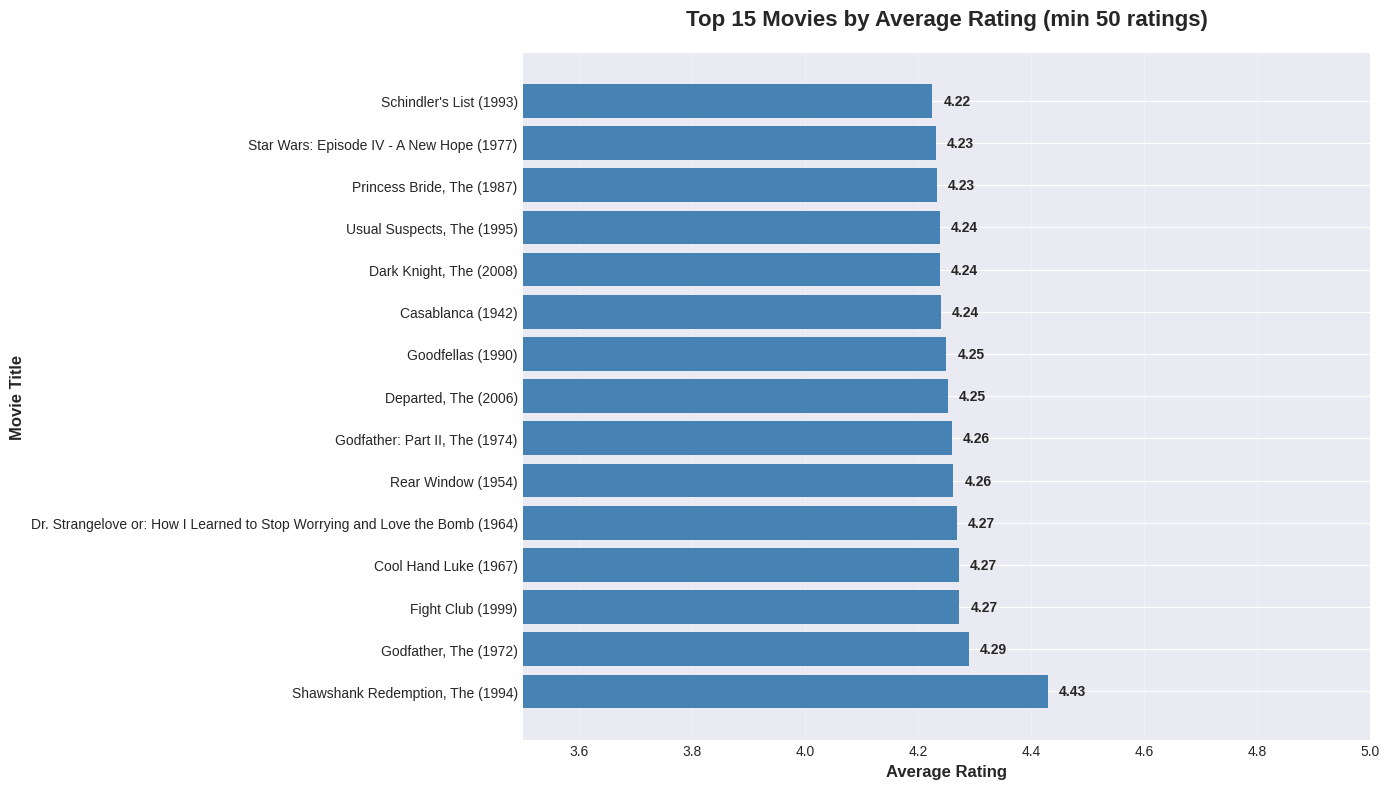

✅ Task 1 Completed: Most Popular Movies Analyzed!


In [6]:
# Visualization for Task 1
plt.figure(figsize=(14, 8))

# Top 15 movies by rating
top_15 = top_movies.head(15)

# Create bar plot
bars = plt.barh(range(len(top_15)), top_15['avg_rating'], color='steelblue')

# Customize the plot
plt.yticks(range(len(top_15)), top_15['title'])
plt.xlabel('Average Rating', fontsize=12, fontweight='bold')
plt.ylabel('Movie Title', fontsize=12, fontweight='bold')
plt.title('Top 15 Movies by Average Rating (min 50 ratings)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlim(3.5, 5.0)

# Add rating values on bars
for i, (bar, rating) in enumerate(zip(bars, top_15['avg_rating'])):
    plt.text(rating + 0.02, i, f'{rating:.2f}',
             va='center', fontweight='bold')

plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

print("✅ Task 1 Completed: Most Popular Movies Analyzed!")

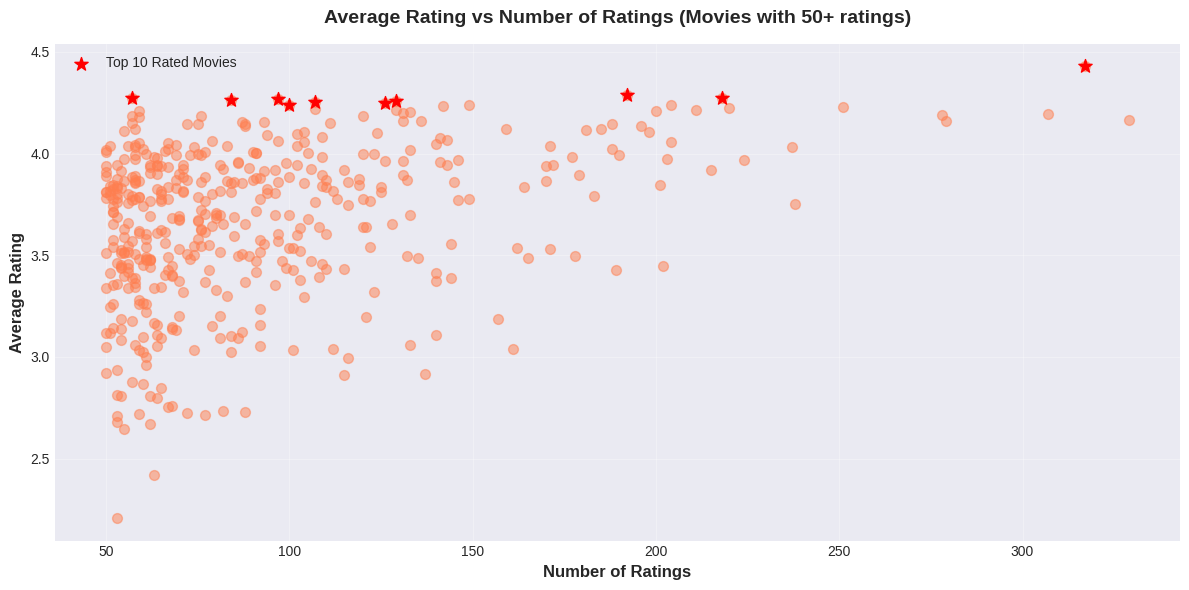

In [7]:
# Scatter plot showing relationship between average rating and number of ratings
plt.figure(figsize=(12, 6))

plt.scatter(popular_movies['num_ratings'],
            popular_movies['avg_rating'],
            alpha=0.5, s=50, c='coral')

plt.xlabel('Number of Ratings', fontsize=12, fontweight='bold')
plt.ylabel('Average Rating', fontsize=12, fontweight='bold')
plt.title('Average Rating vs Number of Ratings (Movies with 50+ ratings)',
          fontsize=14, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3)

# Highlight top movies
top_10 = popular_movies.nlargest(10, 'avg_rating')
plt.scatter(top_10['num_ratings'], top_10['avg_rating'],
            color='red', s=100, marker='*',
            label='Top 10 Rated Movies', zorder=5)

plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Extract genres from movies
# Split genres (they are in format: "Action|Adventure|Sci-Fi")
movies_exploded = movies.copy()
movies_exploded['genres'] = movies_exploded['genres'].str.split('|')

# Explode the genres to have one row per genre
movies_genre = movies_exploded.explode('genres')

# Count movies per genre
genre_counts = movies_genre['genres'].value_counts()

print("Number of Movies per Genre:")
print("="*50)
print(genre_counts)

# Remove '(no genres listed)' if present
if '(no genres listed)' in genre_counts.index:
    genre_counts = genre_counts.drop('(no genres listed)')

print("\n" + "="*50)
print(f"\nTotal unique genres: {len(genre_counts)}")
print(f"Most common genre: {genre_counts.index[0]} ({genre_counts.iloc[0]} movies)")

Number of Movies per Genre:
genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


Total unique genres: 19
Most common genre: Drama (4361 movies)


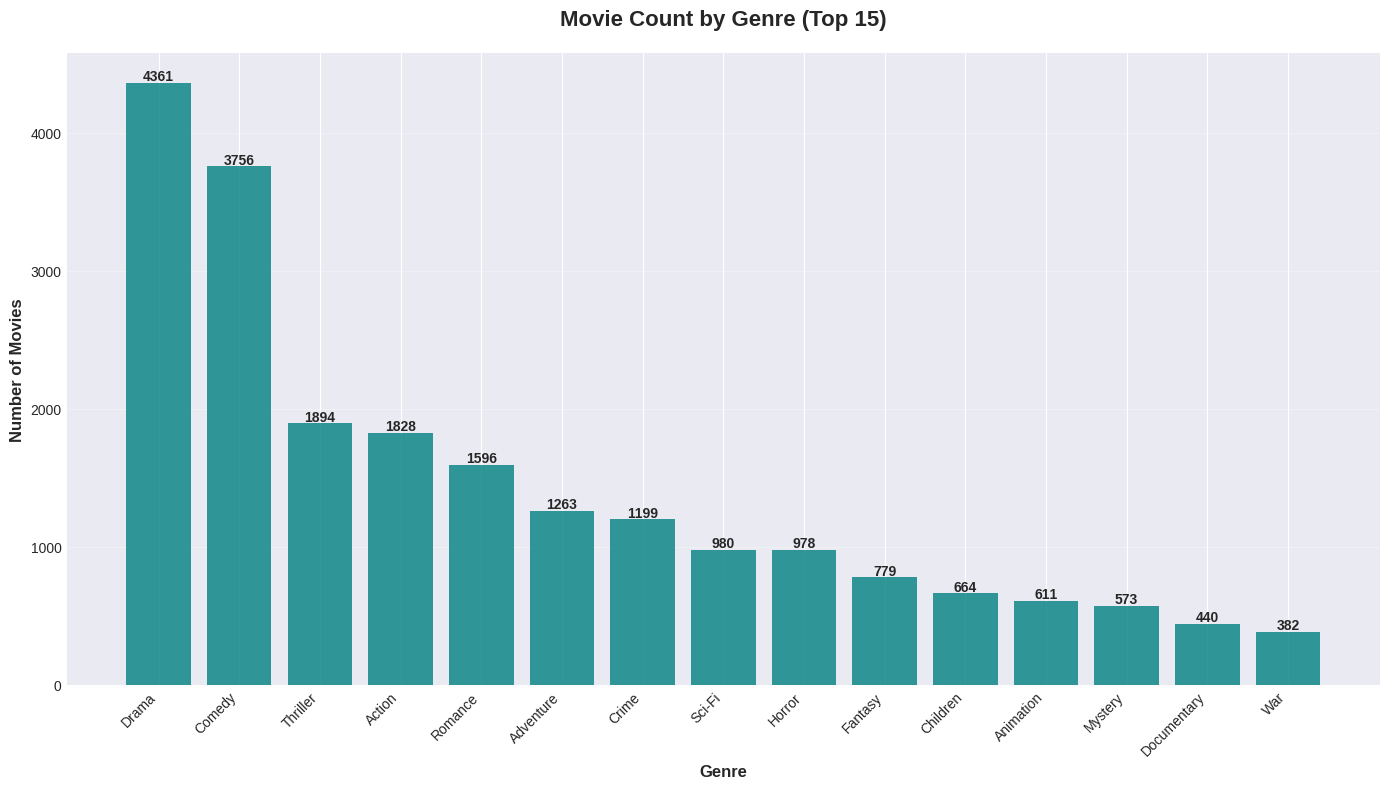

✅ Task 2 Completed: Movies Grouped by Genre!


In [9]:
# Visualization for Task 2 - Bar Chart
plt.figure(figsize=(14, 8))

# Plot top genres
top_genres = genre_counts.head(15)
bars = plt.bar(range(len(top_genres)), top_genres.values, color='teal', alpha=0.8)

plt.xticks(range(len(top_genres)), top_genres.index, rotation=45, ha='right')
plt.xlabel('Genre', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.title('Movie Count by Genre (Top 15)', fontsize=16, fontweight='bold', pad=20)

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, top_genres.values)):
    plt.text(i, count + 20, str(count), ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Task 2 Completed: Movies Grouped by Genre!")

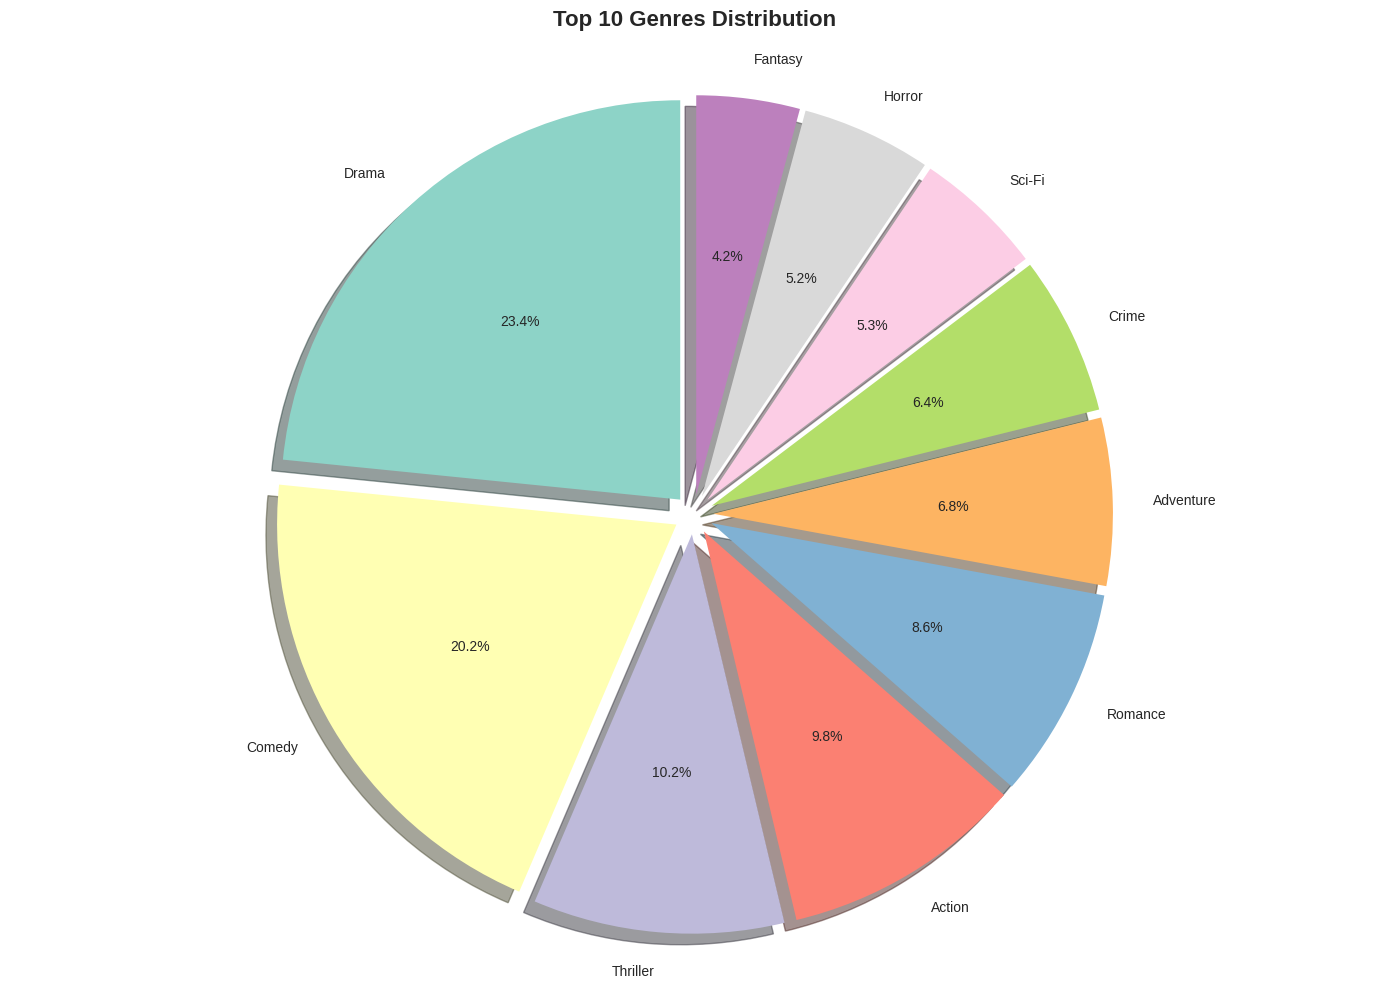

In [10]:
# Pie chart for genre distribution
plt.figure(figsize=(14, 10))

# Top 10 genres for cleaner visualization
top_10_genres = genre_counts.head(10)

# Create pie chart
colors = plt.cm.Set3(range(len(top_10_genres)))
explode = [0.05] * len(top_10_genres)

plt.pie(top_10_genres.values, labels=top_10_genres.index, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode, shadow=True)

plt.title('Top 10 Genres Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [11]:
# Function to recommend movies by genre
def recommend_movies_by_genre(genre, min_ratings=20, top_n=10):
    """
    Recommend top-rated movies in a specific genre

    Parameters:
    - genre: Genre to filter (e.g., 'Action', 'Comedy')
    - min_ratings: Minimum number of ratings required
    - top_n: Number of recommendations to return
    """
    # Filter movies by genre
    genre_movies = movies[movies['genres'].str.contains(genre, case=False, na=False)]

    # Merge with ratings
    genre_ratings = pd.merge(ratings, genre_movies, on='movieId')

    # Calculate statistics
    genre_stats = genre_ratings.groupby('title').agg({
        'rating': ['mean', 'count']
    }).reset_index()

    genre_stats.columns = ['title', 'avg_rating', 'num_ratings']

    # Filter by minimum ratings
    filtered = genre_stats[genre_stats['num_ratings'] >= min_ratings]

    # Sort by average rating
    recommendations = filtered.sort_values('avg_rating', ascending=False).head(top_n)

    return recommendations

# Test the function with different genres
print("="*70)
print("MOVIE RECOMMENDATIONS BY GENRE")
print("="*70)

MOVIE RECOMMENDATIONS BY GENRE


In [12]:
# Recommendations for Action movies
print("\n🎬 TOP 10 ACTION MOVIES")
print("-"*70)
action_recommendations = recommend_movies_by_genre('Action', min_ratings=20, top_n=10)
print(action_recommendations.to_string(index=False))


🎬 TOP 10 ACTION MOVIES
----------------------------------------------------------------------
                                                                         title  avg_rating  num_ratings
                                                                  Logan (2017)    4.280000           25
                                                             Fight Club (1999)    4.272936          218
                                                       Dark Knight, The (2008)    4.238255          149
                                                    Princess Bride, The (1987)    4.232394          142
                                     Star Wars: Episode IV - A New Hope (1977)    4.231076          251
                                                   Boondock Saints, The (2000)    4.220930           43
                                                         Apocalypse Now (1979)    4.219626          107
                         Star Wars: Episode V - The Empire Strikes Back (

In [13]:
# Recommendations for Comedy movies
print("\n😂 TOP 10 COMEDY MOVIES")
print("-"*70)
comedy_recommendations = recommend_movies_by_genre('Comedy', min_ratings=20, top_n=10)
print(comedy_recommendations.to_string(index=False))


😂 TOP 10 COMEDY MOVIES
----------------------------------------------------------------------
                                                                      title  avg_rating  num_ratings
                                             Philadelphia Story, The (1940)    4.310345           29
                                                    Harold and Maude (1971)    4.288462           26
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.268041           97
                                                 Princess Bride, The (1987)    4.232394          142
                                                        Pulp Fiction (1994)    4.197068          307
                       Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    4.183333          120
                                                        Forrest Gump (1994)    4.164134          329
                                     Monty Python and the Holy Grail (1975)    4.161765          

In [14]:
# Recommendations for Drama movies
print("\n TOP 10 DRAMA MOVIES")
print("-"*70)
drama_recommendations = recommend_movies_by_genre('Drama', min_ratings=20, top_n=10)
print(drama_recommendations.to_string(index=False))


🎭 TOP 10 DRAMA MOVIES
----------------------------------------------------------------------
                                        title  avg_rating  num_ratings
             Streetcar Named Desire, A (1951)    4.475000           20
             Shawshank Redemption, The (1994)    4.429022          317
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    4.333333           27
               Philadelphia Story, The (1940)    4.310345           29
                    Lawrence of Arabia (1962)    4.300000           45
             In the Name of the Father (1993)    4.300000           25
                        Godfather, The (1972)    4.289062          192
                      Harold and Maude (1971)    4.288462           26
                            Fight Club (1999)    4.272936          218
                        Cool Hand Luke (1967)    4.271930           57


In [15]:
# Recommendations for Sci-Fi movies
print("\n TOP 10 SCI-FI MOVIES")
print("-"*70)
scifi_recommendations = recommend_movies_by_genre('Sci-Fi', min_ratings=20, top_n=10)
print(scifi_recommendations.to_string(index=False))

print("\n Task 3 Completed: Genre-Based Recommendations Generated!")


🚀 TOP 10 SCI-FI MOVIES
----------------------------------------------------------------------
                                                title  avg_rating  num_ratings
                                         Logan (2017)    4.280000           25
            Star Wars: Episode IV - A New Hope (1977)    4.231076          251
Star Wars: Episode V - The Empire Strikes Back (1980)    4.215640          211
                                   Matrix, The (1999)    4.192446          278
                                        Brazil (1985)    4.177966           59
         Eternal Sunshine of the Spotless Mind (2004)    4.160305          131
           Ghost in the Shell (Kôkaku kidôtai) (1995)    4.148148           27
    Star Wars: Episode VI - Return of the Jedi (1983)    4.137755          196
                                  Blade Runner (1982)    4.100806          124
      Grand Day Out with Wallace and Gromit, A (1989)    4.089286           28

✅ Task 3 Completed: Genre-Based Rec

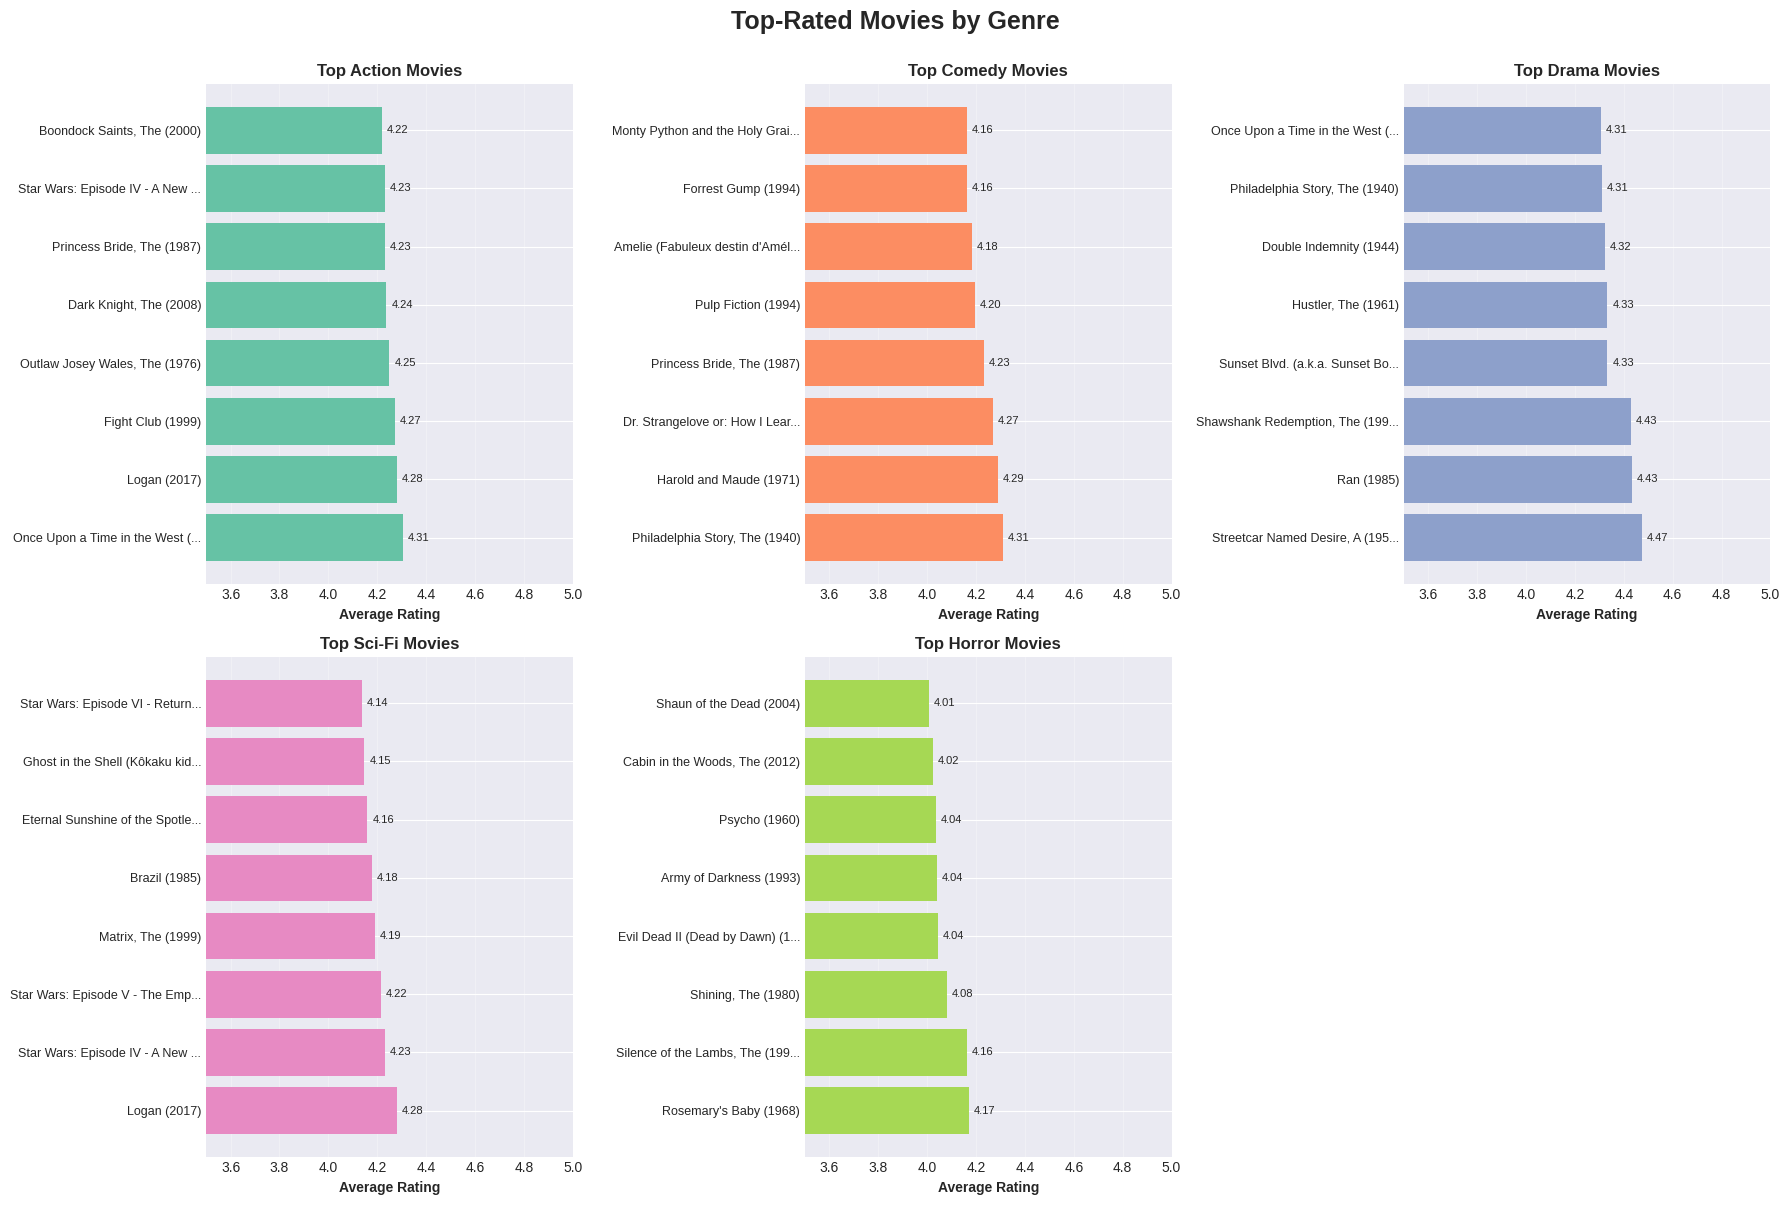

In [16]:
# Compare top movies across different genres
genres_to_compare = ['Action', 'Comedy', 'Drama', 'Sci-Fi', 'Horror']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, genre in enumerate(genres_to_compare):
    recommendations = recommend_movies_by_genre(genre, min_ratings=15, top_n=8)

    ax = axes[idx]
    bars = ax.barh(range(len(recommendations)),
                    recommendations['avg_rating'],
                    color=plt.cm.Set2(idx))

    ax.set_yticks(range(len(recommendations)))
    ax.set_yticklabels([title[:30] + '...' if len(title) > 30 else title
                        for title in recommendations['title']], fontsize=9)
    ax.set_xlabel('Average Rating', fontweight='bold')
    ax.set_title(f'Top {genre} Movies', fontweight='bold', fontsize=12)
    ax.set_xlim(3.5, 5.0)
    ax.grid(axis='x', alpha=0.3)

    # Add rating labels
    for i, rating in enumerate(recommendations['avg_rating']):
        ax.text(rating + 0.02, i, f'{rating:.2f}', va='center', fontsize=8)

# Hide extra subplot
axes[-1].axis('off')

plt.suptitle('Top-Rated Movies by Genre', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [17]:
# Create an interactive recommendation system
def get_recommendations_interactive():
    """Interactive function to get movie recommendations"""

    print("\n" + "="*70)
    print(" MOVIE RECOMMENDATION SYSTEM ")
    print("="*70)

    # Show available genres
    available_genres = genre_counts.head(15).index.tolist()

    print("\nAvailable Genres:")
    for i, genre in enumerate(available_genres, 1):
        print(f"{i}. {genre}")

    print("\nEnter genre name from the list above:")
    genre = input("Genre: ").strip()

    if genre in available_genres:
        print(f"\n Top 10 Recommendations for {genre} Movies:")
        print("-"*70)
        recommendations = recommend_movies_by_genre(genre, min_ratings=15, top_n=10)

        for idx, row in recommendations.iterrows():
            print(f"⭐ {row['title']}")
            print(f"   Rating: {row['avg_rating']:.2f}/5.0 ({int(row['num_ratings'])} ratings)")
            print()
    else:
        print(f"❌ Genre '{genre}' not found. Please try again.")

# Uncomment the line below to run interactively
# get_recommendations_interactive()

print("Interactive recommendation function created!")
print("Run: get_recommendations_interactive() to use it")

Interactive recommendation function created!
Run: get_recommendations_interactive() to use it


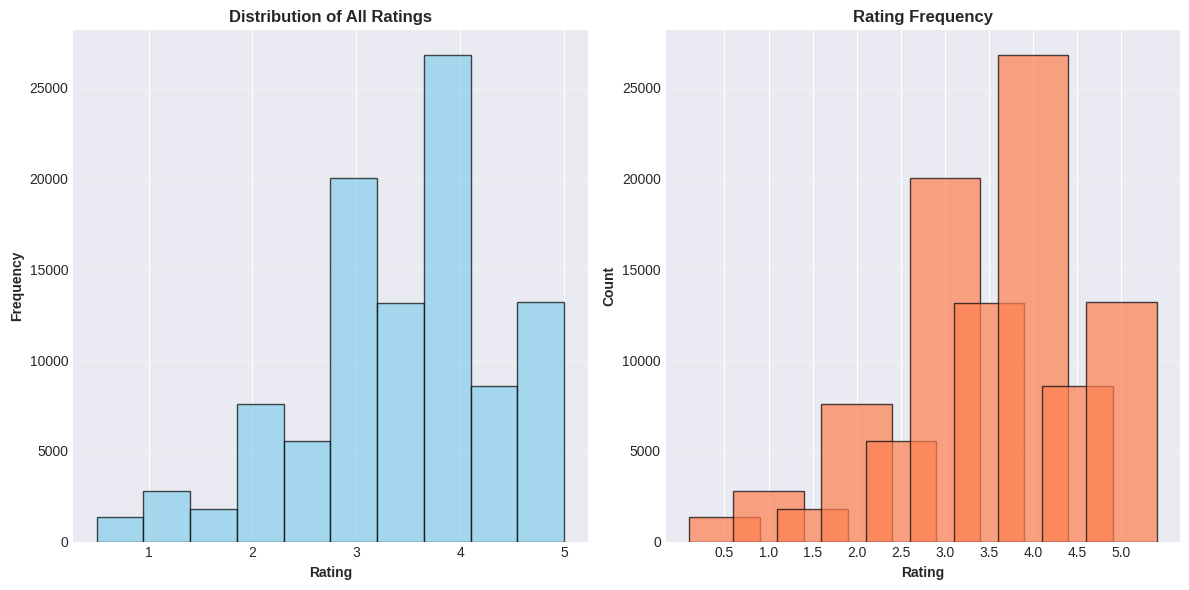

In [18]:
# Distribution of ratings
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(ratings['rating'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of All Ratings', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
rating_counts = ratings['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Rating Frequency', fontweight='bold')
plt.xticks(rating_counts.index)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Final summary
print("\n" + "="*70)
print("📊 PROJECT SUMMARY - MOVIE RECOMMENDATION SYSTEM")
print("="*70)

print(f"\n TASK 1: Most Popular Movies Analysis")
print(f"   - Total movies analyzed: {len(movie_stats)}")
print(f"   - Top rated movie: {top_movies.iloc[0]['title']}")
print(f"   - Highest average rating: {top_movies.iloc[0]['avg_rating']:.2f}")

print(f"\n TASK 2: Genre Distribution")
print(f"   - Total unique genres: {len(genre_counts)}")
print(f"   - Most popular genre: {genre_counts.index[0]} ({genre_counts.iloc[0]} movies)")
print(f"   - Least popular genre: {genre_counts.index[-1]} ({genre_counts.iloc[-1]} movies)")

print(f"\n TASK 3: Genre-Based Recommendations")
print(f"   - Recommendation system created successfully")
print(f"   - Can recommend movies for {len(genre_counts)} different genres")

print("\n" + "="*70)
print("🎉 ALL TASKS COMPLETED SUCCESSFULLY!")
print("="*70)


📊 PROJECT SUMMARY - MOVIE RECOMMENDATION SYSTEM

✅ TASK 1: Most Popular Movies Analysis
   - Total movies analyzed: 9719
   - Top rated movie: Shawshank Redemption, The (1994)
   - Highest average rating: 4.43

✅ TASK 2: Genre Distribution
   - Total unique genres: 19
   - Most popular genre: Drama (4361 movies)
   - Least popular genre: Film-Noir (87 movies)

✅ TASK 3: Genre-Based Recommendations
   - Recommendation system created successfully
   - Can recommend movies for 19 different genres

🎉 ALL TASKS COMPLETED SUCCESSFULLY!


In [20]:
# Export results for GitHub repository
# Save top movies
top_movies.to_csv('top_rated_movies.csv', index=False)
print(" Saved: top_rated_movies.csv")

# Save genre statistics
genre_counts.to_csv('genre_distribution.csv', header=['count'])
print(" Saved: genre_distribution.csv")

# Save sample recommendations for each major genre
major_genres = ['Action', 'Comedy', 'Drama', 'Sci-Fi', 'Thriller']
all_recommendations = []

for genre in major_genres:
    recs = recommend_movies_by_genre(genre, min_ratings=15, top_n=10)
    recs['genre'] = genre
    all_recommendations.append(recs)

final_recs = pd.concat(all_recommendations, ignore_index=True)
final_recs.to_csv('genre_recommendations.csv', index=False)
print(" Saved: genre_recommendations.csv")

print("\n All results saved! Ready for GitHub upload.")

✅ Saved: top_rated_movies.csv
✅ Saved: genre_distribution.csv
✅ Saved: genre_recommendations.csv

📁 All results saved! Ready for GitHub upload.
